# Project

The project aims to build a machine learning model using various Python-based machine learning libraries to predict whether or not someone has heart disease based on their medical attributes.

## Problem Definition

We are dealing with a Binary classification problem. To classify whether someone has a heart disease based on given clinical parameters.

## About Data

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. This database includes 76 attributes, but all published studies relate to using a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient whether that particular person has heart disease or not and the other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

- **age:** It is the age of the patient in the years unit; Integer
- **sex:** Patient is either male or female; categorical field
- **cp:** level of chest pain; categorical 
    - 0: Typical Angina: chest pain related to decreased blood supply to the heart.
    - 1: Atypical Angina: chest pain not related to the heart.
    - 2: Non-anginal pain: typically esophageal spasms (non-heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease.
- **trestbps:** resting blood pressure (on admission to the hospital), which is measured in 'mm Hg'; Integer
    - anything above 130-140 is typically cause for concern
- **chol:** serum cholesterol level in 'mg/dl', above 200 can causes a concern; Integer
- **fbs:** fasting blood sugar > 120 mg/dl; Categorical field -- values [1- Ture, 0-false]
- **restecg:** resting electrocardiographic results
    - Value 0: Normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
- **thalach:** maximum heart rate achieved; Integer
- **exang:** exercise-induced angina; Categorical --values [1- yes, 0- no]
- **oldpeak:** ST depression induced by exercise relative to rest; Integer
  - a phenomenon where a person's electrocardiogram (ECG) shows a downward deflection of the ST segment during exercise, which is not present when they are at rest, indicating potential coronary artery disease (CAD) as the heart muscle may not be receiving enough blood flow during increased demand due to exercise.
- **slope:** the slope of the peak exercise ST segment; categorical -- values [flat, downsloping, upsloping]
  - 0: Upsloping: better heart rate with excercise (uncommon)
  - 1: Flatsloping: minimal change (typical healthy heart)
  - 2: Downslopins: signs of unhealthy heart
- **ca:** number of major vessels (0-3) coloured by fluoroscopy; Integer
- **thal:** thalium stress result
    - Value 0 = normal;
    - Value 1 = fixed defect;
    - Value 2 = reversible defect
- **target:** has a heart disease or not; categorical


## Evalution Metric

Initially, the target of the model is to achieve 95% accuracy, which might vary based on the performance of models and other metrics such as AUC-ROC, confusion matrix and classification report.  

## Imports - tools needed for the project

In [173]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.inspection import permutation_importance

## Data Exploration

In [2]:
data = pd.read_csv("./heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preliminary Exploration
How many rows and columns are there? Check for the missing values and duplicate rows. What are Dtypes of the columns

In [3]:
data.shape

(303, 14)

- the dataset consists of 14 columns and 303 rows.

In [4]:
# Missing value
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#duplicate values
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
#checking the class balance of the target variable
data["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

### Descriptive Statistics of a numeric field


In [8]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
data[num_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [9]:
## Descriptive Stats for heart disease.
data[data["target"] == 1][num_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,52.585366,129.250000,242.640244,158.378049,0.586585
std,9.511957,16.204739,53.456580,19.199080,0.781734
min,29.000000,94.000000,126.000000,96.000000,0.000000
25%,44.750000,120.000000,208.750000,148.750000,0.000000
50%,52.000000,130.000000,234.500000,161.000000,0.200000
75%,59.000000,140.000000,267.250000,172.000000,1.025000
max,76.000000,180.000000,564.000000,202.000000,4.200000


- The average `age` of having a heart disease is around 53 years only.
- Patients having heart disease at the lowest `age` of 29. 
- 75% of patients who have a disease have `chol` greater than 200, which is considered to be borderline risk.
- 50% of patients having the disease have a `Blood pressure (trestbps)` of 130, which is Stage 1 Risk
- The max `Blood pressure` of the patient is 180 (stage 3 risk). However, that's not the max in the whole data. There are some with 200 with not have heart disease. 

### Young Adult have heart disease; age < 40
pull out the patients with age < then 40 and has the heart disease.

In [10]:
data.query('target == 1 and age < 40')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


- The person with the lowest age has a cholesterol of > 200, which is concerning. and slop 2, which is a sign of an unhealthy heart.
- In young Adult patients, either chol is high, or slop is 2, which leads to heart disease. We can verify later all the patients.
- None of them had pain in the chest while exercising. (exang) and their stress level were normal too (thal)

### Number of Patients with heart disease by gender?
How many males and females have the heart disease?

In [11]:
data["sex"].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [12]:
count_gender = data.groupby(["sex", "target"], as_index=False).size()
count_gender
#we can use crosstab too

,sex,target,size
0,0,0,24
1,0,1,72
2,1,0,114
3,1,1,92


In [13]:
count_gender['sex'] = count_gender['sex'].map({1 : 'Male', 0 : 'Female'})

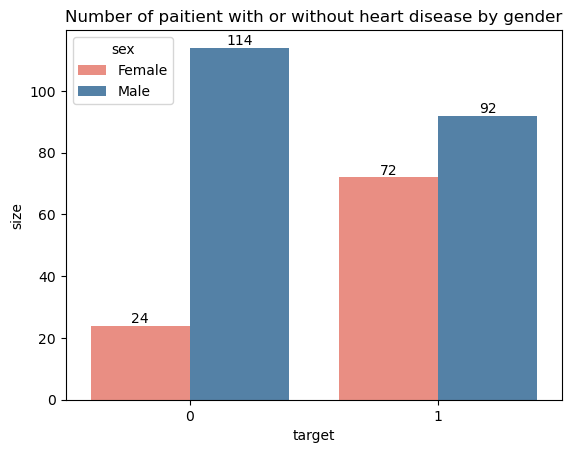

In [14]:
ax = sns.barplot(count_gender, x="target", y="size", hue="sex", palette=["Salmon", "steelblue"])
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Number of paitient with or without heart disease by gender")

plt.show()

- Out of 96 total females, 72 have heart disease; more than three-quarters of total females
- Out of the total males, almost 45% suffer from heart disease.
- In comparison, 7.8 out of 10 females and 4.5 out of 10 males have heart disease.

### Chest pain per the heart disease frequency.
What type of pain do the patients have with most heart disease? 

In [16]:
chest_pain_target = pd.crosstab(data["cp"], data["target"])
chest_pain_target

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


meaning of Chest pain values:-
- 0: Typical Angina: chest pain related to decreased blood supply to the heart.
- 1: Atypical Angina: chest pain may or may not relate to the heart; pain that doesn't fit the usual description of pain.
- 2: Non-anginal pain: feels like pain from the heart, but it does not originate from the heart (non-heart related)
- 3: Asymptomatic: chest pain not showing signs of disease.

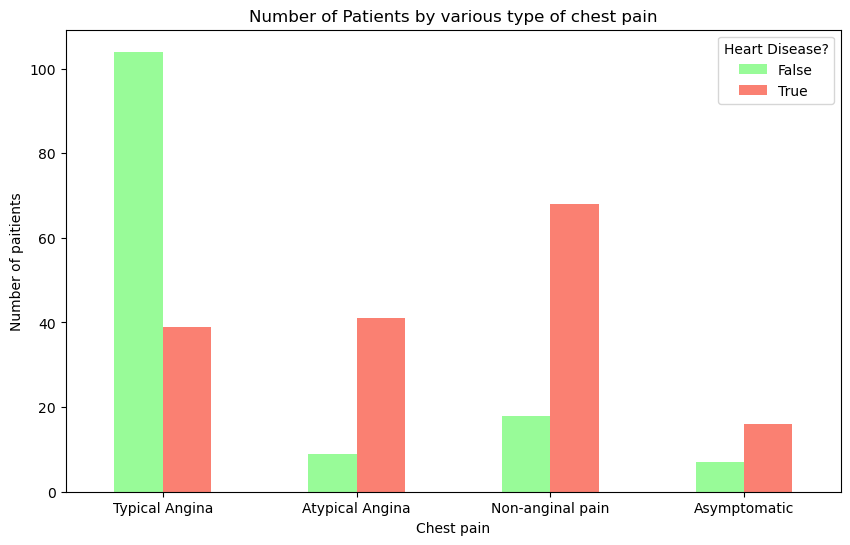

In [17]:
#plot a bar chart
chest_pain_target.plot(kind="bar", figsize=(10,6), color=["palegreen", "salmon"])
plt.legend(["False", "True"], title="Heart Disease?")

plt.title("Number of Patients by various type of chest pain")
plt.ylabel("Number of paitients")

plt.xlabel("Chest pain")
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=["Typical Angina", "Atypical Angina", "Non-anginal pain", "Asymptomatic"], 
           rotation="horizontal")
plt.show()

- Intriguing, 60% of ppl with pain because of a decrease in the blood supply in the heart do not have heart disease.
- Patients with all other types of pain have a higher chance of having heart disease.
- Surprisingly, Non-anginal pain is not related to the heart; it has the highest number of heart disease patients. 

### Exang with target variable

In [18]:
excerise_chest_pain_target = pd.crosstab(data["exang"], data["target"])
excerise_chest_pain_target

target,0,1
exang,,
0,62,141
1,76,23


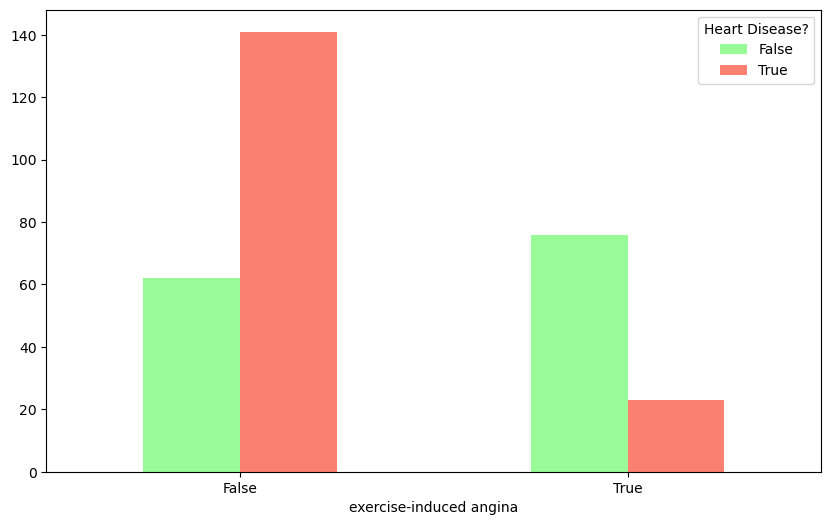

In [19]:
excerise_chest_pain_target.plot(kind="bar", figsize=(10,6), color=["palegreen", "salmon"])

plt.xlabel("exercise-induced angina")
plt.xticks([0,1], ["False","True"], rotation="horizontal")

plt.legend(["False", "True"], title="Heart Disease?")

plt.show()

- Out of all patients having heart disease, 85% of People do not have `exang`; which means the highest number of patients don't have problem with chest pain while exercising but suffer from heart problems.
- Only 23 ppl, which is 7.5 percent of the total, fall under both categories.

### Maximum heart rate by age having and not having heart disease. 

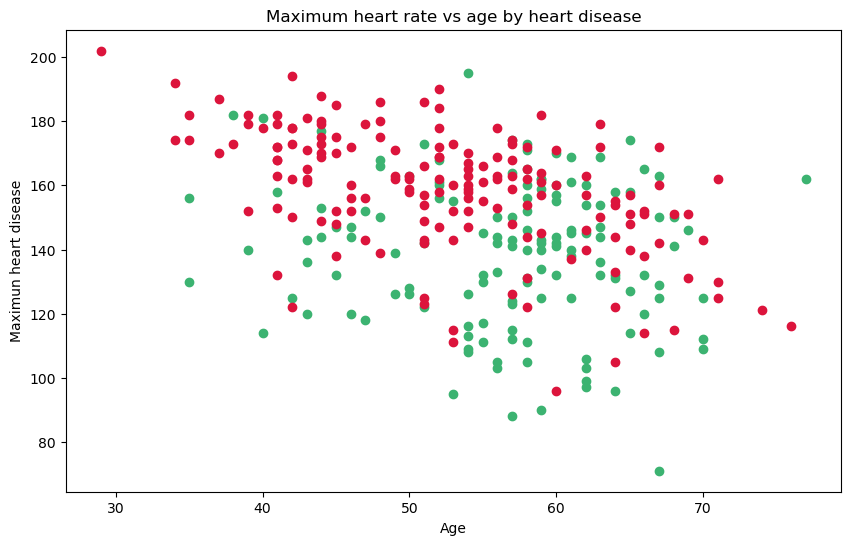

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(data[data["target"] == 0]["age"], data[data["target"] == 0]["thalach"], color="mediumseagreen", label="no heart disease")
ax.scatter(data[data["target"] == 1]["age"],  data[data["target"] == 1]["thalach"], color="crimson", label="has heart disease")

ax.set(title="Maximum heart rate vs age by heart disease", xlabel="Age", ylabel="Maximun heart disease")

plt.show()

- We can see a decrease in heart disease as the age increases.

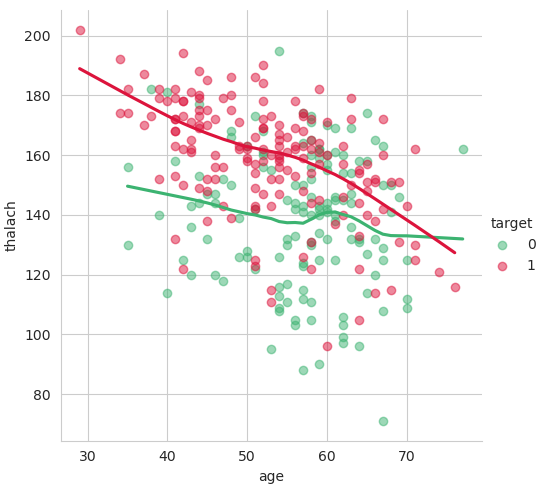

In [21]:
#visuilize with 
with sns.axes_style("whitegrid"):
    sns.lmplot(data=data, 
               y="thalach", 
               x="age", 
               lowess=True, 
               hue="target",
               palette=["mediumseagreen", "crimson"],
               scatter_kws = {'alpha': 0.5})

plt.show()

### Correlation matrix

In [22]:
corr_matrix  = data.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


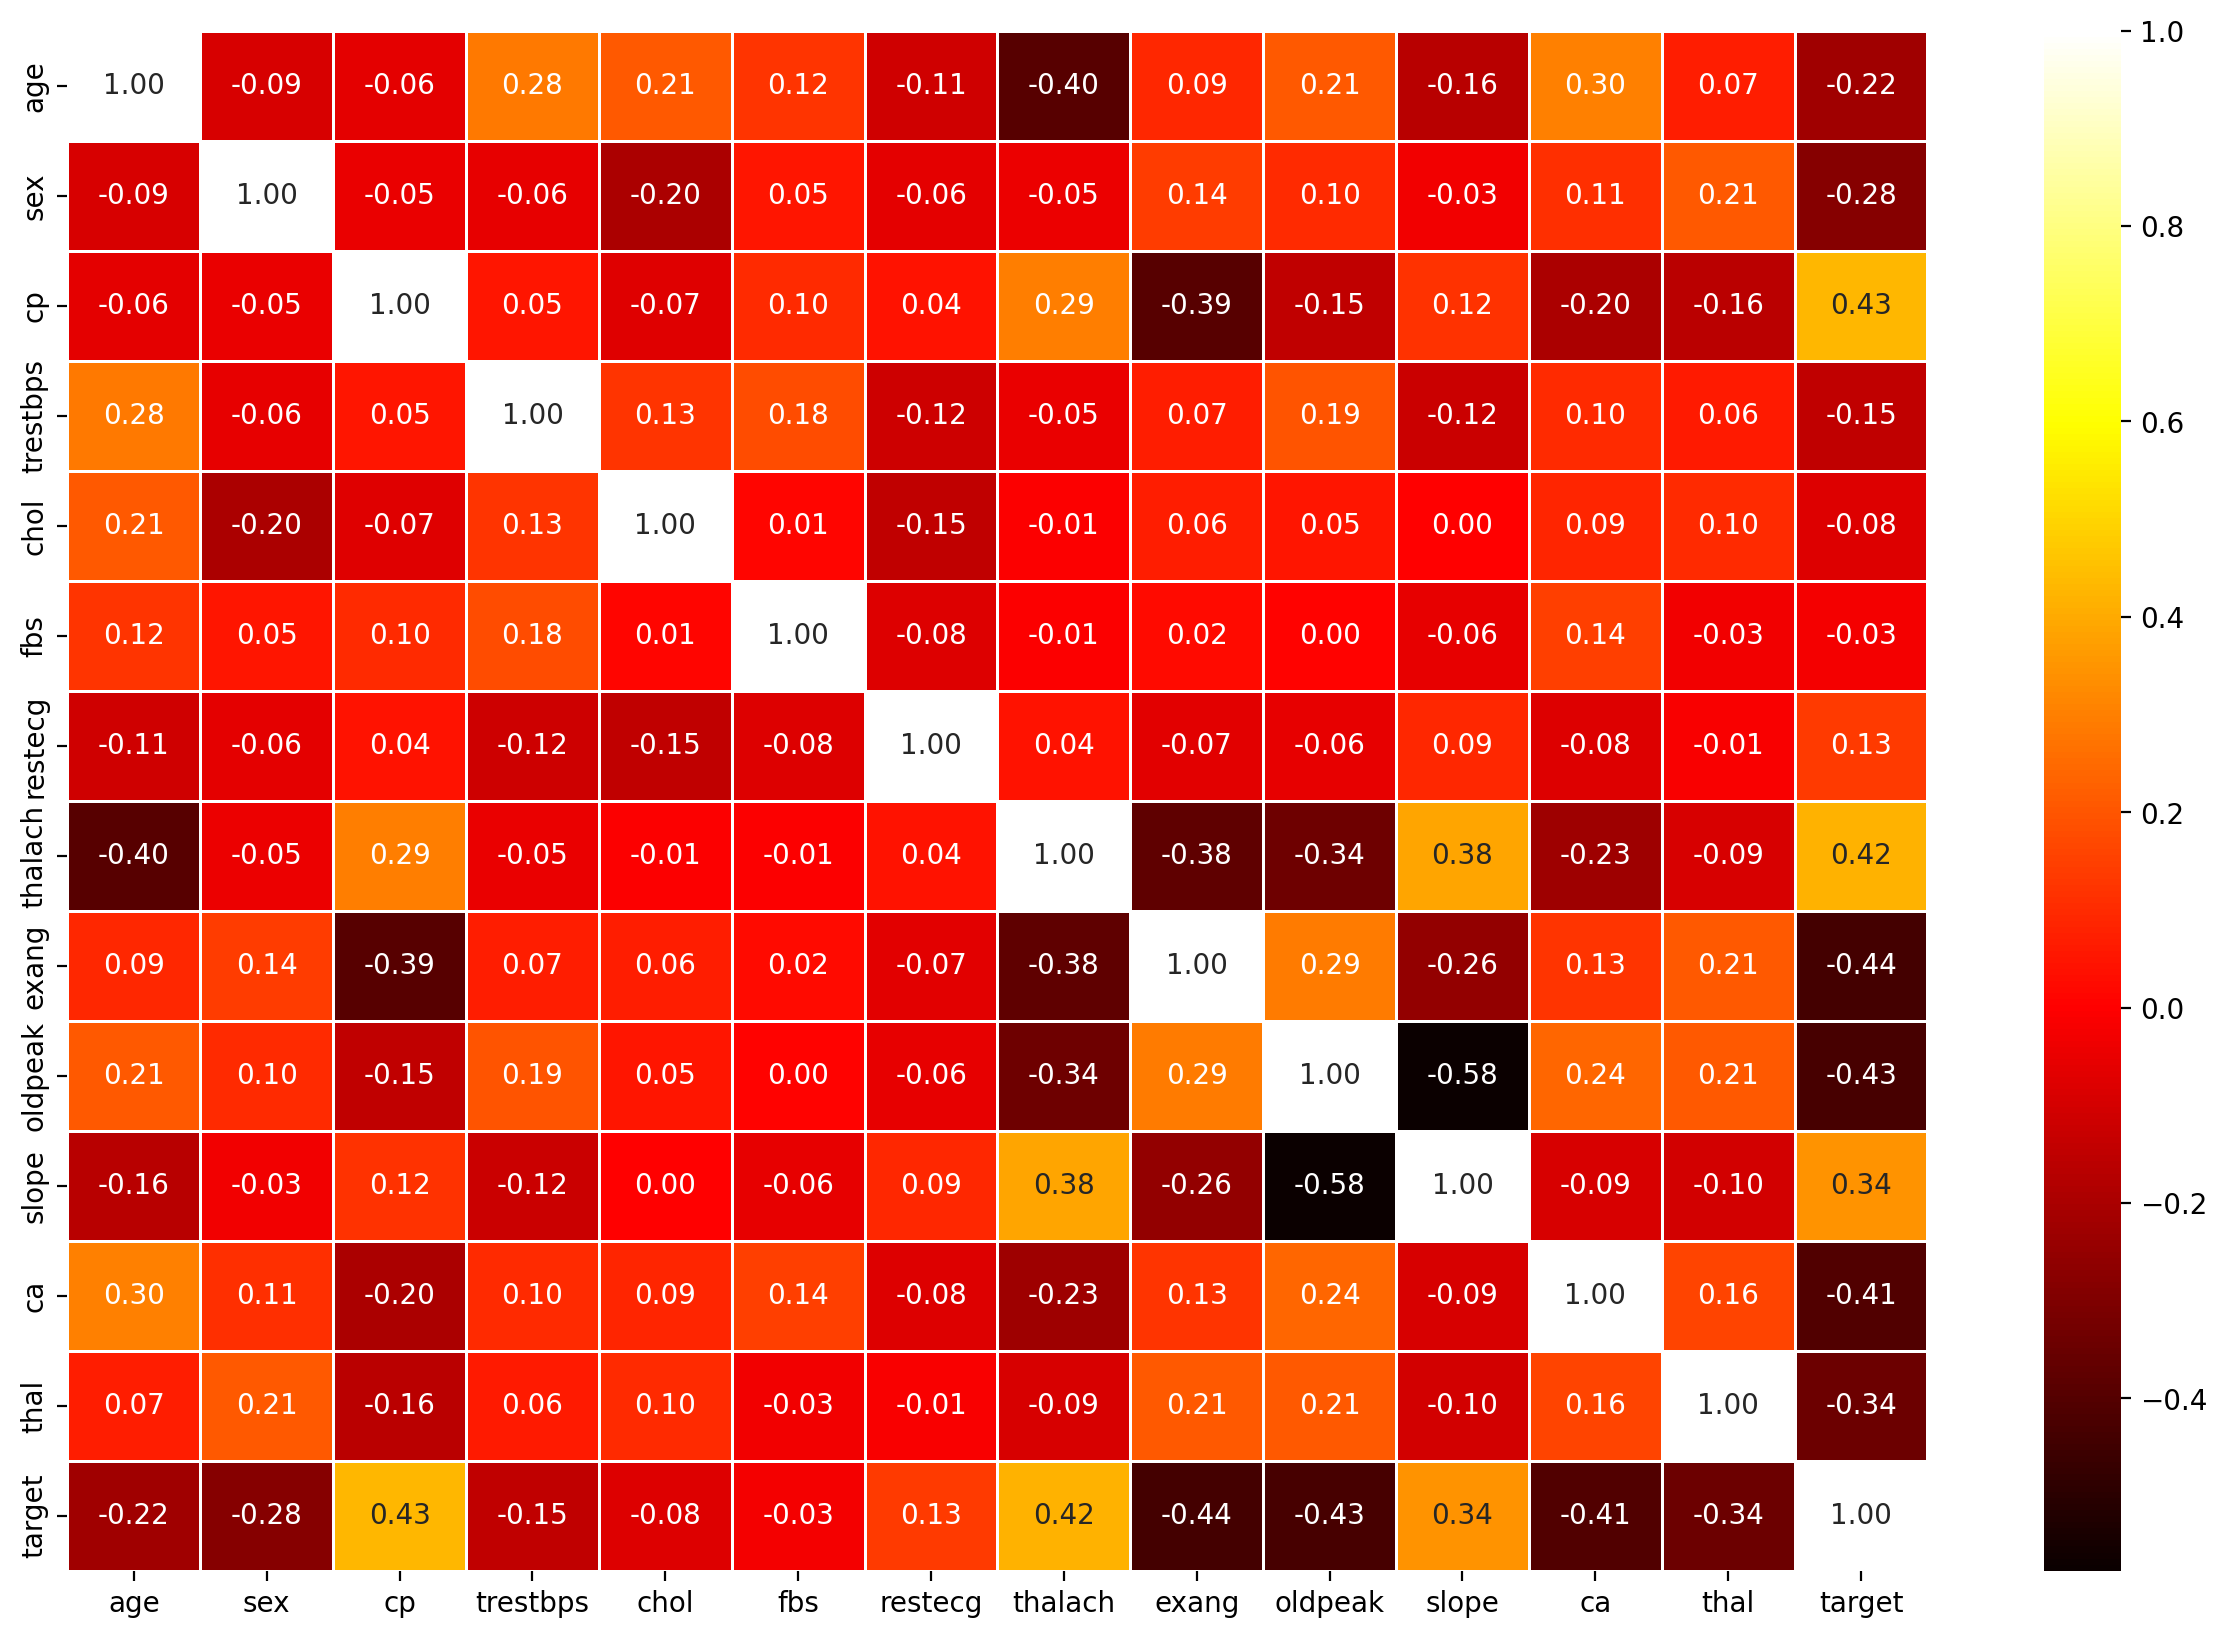

In [23]:
# correlation heap map
fig, ax = plt.subplots(figsize=(15,10), dpi=200)
ax = sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap="hot")

plt.show()

- a positive correlation means that as these variables (chest pain or max heart rate) increase, the likelihood of the target condition (heart disease) increases.
- A negative correlation means higher ca (number major vessels), oldpeak and exang less likely to have heart disease. 

### Histplot

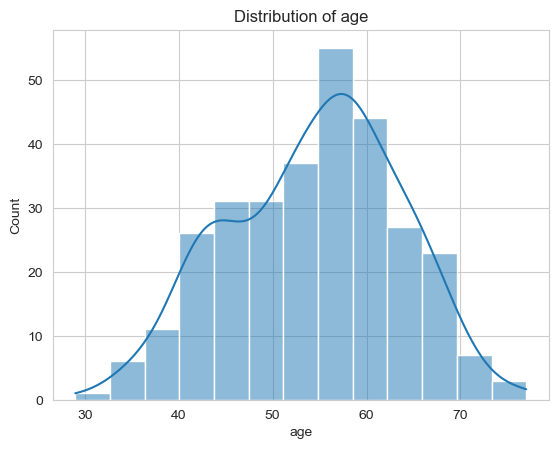

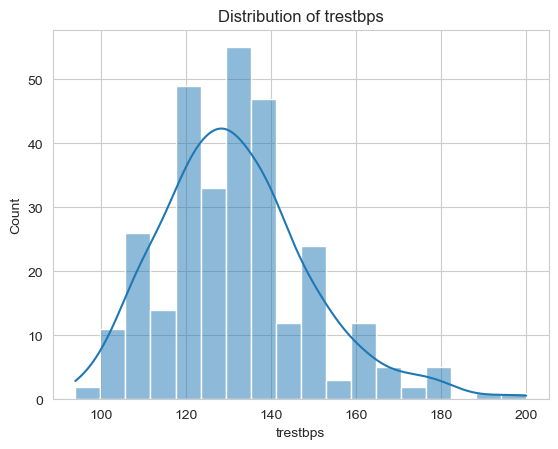

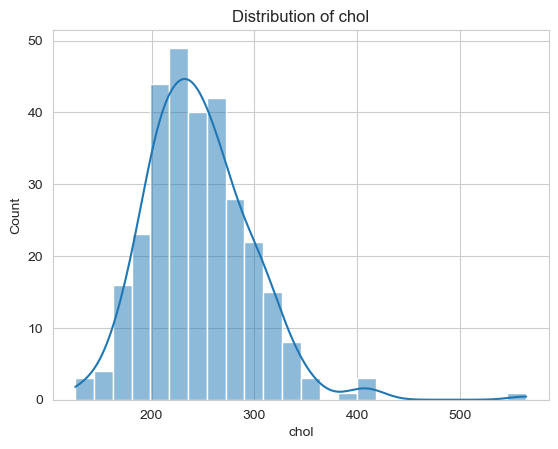

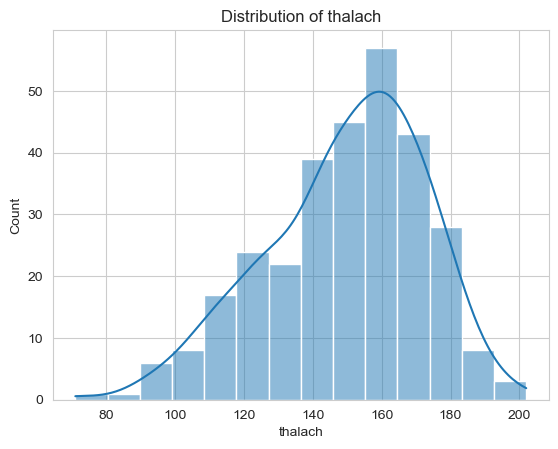

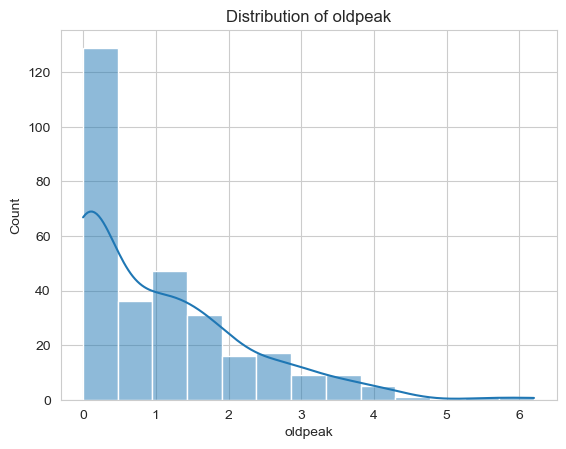

In [24]:
columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for c in columns:
    with sns.axes_style("whitegrid"):

        sns.histplot(data[c], kde=True)
        plt.title(f'Distribution of {c}')
        plt.show()

## Modelling

### Prepare the data

In [25]:
# split the data

X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [26]:
# standard Scaling

scaler = StandardScaler()
columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

col_trans = ColumnTransformer(transformers=[
    ("scaler", scaler, columns)
], remainder="passthrough")

scaled_X_train = col_trans.fit_transform(X_train)
scaled_X_test = col_trans.transform(X_test)

### Machine Learning
we are ging to try with three different models

1. Logistic Regression
2. KNeighbours Classifier
3. Ensemble model - RandomForest

In [27]:
model = {"Logistic Regression":  LogisticRegression(),
         "SVC": SVC(),
         "KNN": KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier(),
        }

In [28]:
def fit_and_score(models:dict, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate the machine learning models
    
    models: a dict of estimators with model name as a key and estimator as a value
    X_train: training data features only    
    X_test: testing dataset features only
    y_train: labels of the training dataset
    y_test: Testing dataset labels
    """

    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train) # model training
        model_scores[name] = model.score(X_test, y_test) # add score of the model to dict

    return model_scores

In [29]:
modelScore = fit_and_score(model, X_train, X_test, y_train, y_test)

/Users/akshilshah/Desktop/sampleproject/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print("Accuracy of different baseline models")
modelScore = pd.DataFrame(modelScore, index=["Accuracy"])
modelScore

Accuracy of different baseline models


,Logistic Regression,SVC,KNN,Random Forest
Accuracy,0.852459,0.704918,0.655738,0.885246


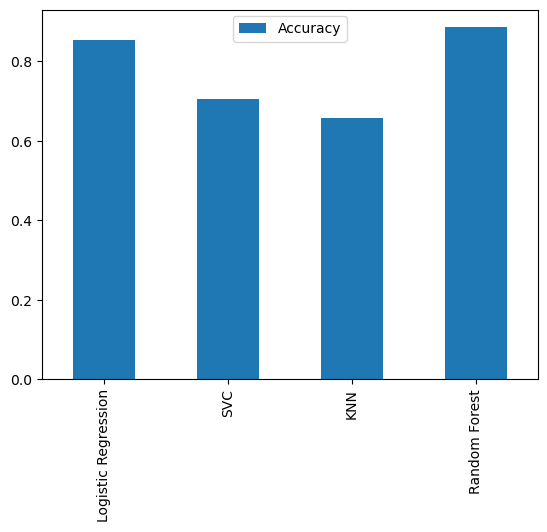

In [31]:
modelScore.T.plot(kind='bar') #transpose the dataframe.
plt.show()

### Improving Performance by hyperparameter Tuning

Since KNN has the lowest score so lets try to improve that by trying training with different parameters

In [32]:
train_scores = []
test_scores = []

neighbours = range(5, 21, 1) #5 to 20

for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

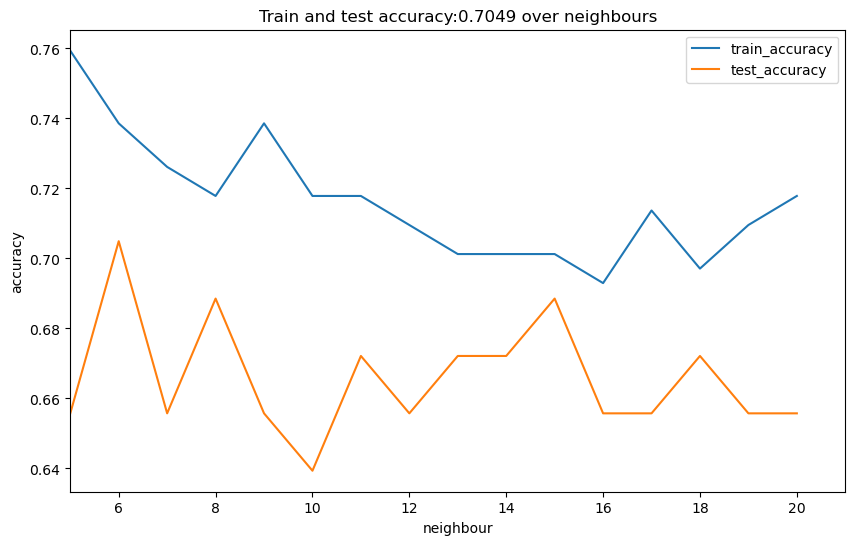

In [33]:
#plot train scores vs test scores over neighbours
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(neighbours, train_scores, label="train_accuracy")
ax.plot(neighbours, test_scores, label="test_accuracy")

ax.set(title=f"Train and test accuracy:{max(test_scores):.4f} over neighbours", xlabel="neighbour", ylabel="accuracy")
ax.set_xlim(5,21)

plt.legend()

plt.show()

- the best test score is when k=6 with accuracy score of 70.49 percent which is still less than other baseline model

We might wanna exclude KNN and move to improve other estimators

**Here is the process we are gonna follow**

- Hyperparameter tuning using grid search CV for Random forest, SVM classifier, and logistic regression. 
- feature scaling using a standard scaler.

In [34]:
# Grid Search CV
log_reg_param = { 'C': np.logspace(-4,4,50) }

svm_param = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

random_forest_param = {'max_depth': [30, 50, 70, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, None],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [35]:
# Grid Search CV random forest 
random_forest_cv = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=random_forest_param,
                                cv=5, 
                                verbose=2)

# Grid Search CV svm
svm_cv = GridSearchCV(estimator=SVC(),
                                param_grid=svm_param,
                                cv=5, 
                                verbose=2)

# Grid Search CV logistic regression
log_regr_cv = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=log_reg_param,
                                cv=5, 
                                verbose=2)


In [36]:
# let fit the data to all cvs
grid_search_cv = {"Logistic Regression":  log_regr_cv,
         "SVC": svm_cv,
         "Random Forest" : random_forest_cv,
        }

best_param = {}

for name, gridsearchcv in grid_search_cv.items():
    # Set the training dataset
    train = X_train if name == "Random Forest" else scaled_X_train
    #fit the data
    gridsearchcv.fit(train, y_train)
    #save the best parameter
    best_param[name] = gridsearchcv.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ...........................C=0.00014563484775012445; total time=   0.0s
[CV] END ...........................C=0.00014563484775012445; total time=   0.0s
[CV] END ...........................C=0.00014563484775012445; total time=   0.0s
[CV] END ...........................C=0.00014563484775012445; total time=   0.0s
[CV] END ...........................C=0.00014563484775012445; total time=   0.0s
[CV] END ...........................C=0.00021209508879201905; total time=   0.0s
[CV] END ...........................C=0.0002120

/Users/akshilshah/Desktop/sampleproject/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
750 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/akshilshah/Desktop/sampleproject/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/akshilshah/Desktop/sampleproject/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/akshilshah/Desktop/sampleproject/env/lib/python3.12/site-packages/sklearn/bas

In [37]:
for name, bestparam in best_param.items():
    print(name, bestparam)

Logistic Regression {'C': 0.05963623316594643}
SVC {'C': 1, 'kernel': 'rbf'}
Random Forest {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 200}


In [38]:
# model accuracy 
model_accuracy = {}

for name, model in grid_search_cv.items():
    test = X_test if name == "Random Forest" else scaled_X_test
    model_accuracy[name] = model.score(test, y_test)

model_accuracy

{'Logistic Regression': 0.8688524590163934,
 'SVC': 0.8852459016393442,
 'Random Forest': 0.8688524590163934}

In [39]:
print("Baseline model")
modelScore

Baseline model


,Logistic Regression,SVC,KNN,Random Forest
Accuracy,0.852459,0.704918,0.655738,0.885246


Comparing the model accuracy with the baseline models

- Logistic Regression accuracy improved by 1.5% whereas Random forest accuracy dropped by almost 2%.
- SVC or support vector machine shows the biggest improvement by 18%, and SVC accuracy after hyperparameter tuning is 88.52% which higher than any other model.

## Evaluation

Discard Random Forest, here is the reason why.

- Random Forest takes significantly longer for training and prediction, which may not be feasible for real-time or resource-limited scenarios.
- Even with hyperparameter tuning, Random Forest doesn't offer a clear advantage over Logistic Regression or SVC in term of accuracy.

In [41]:
grid_search_cv.pop("Random Forest")

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 50, 70, 80, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, None],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             verbose=2)

In [56]:
def evaluate_model(estimators, X_test, y_test,):
    """
    Evaluating estimators on the other key following metrics,
    Precision - accuracy of the positive prediction.
    Recall - identifying actual positive values predicted correctly
    F1 Socore - the balance between precision and recall
    AUC_ROC - Score between True Positive Rate and False Negative Rate.

    return following:
    metrics - dict; precision, recall, F1 and auc roc scores for all estimators
    confusionmatrix - dict; confusion matrix for all estimators
    plot_roccurve - dict; plot ROC curve for all the estimators.
    """

    metrics = {}
    confusionmatrix = {}
    plot_roccurve = {}
    
    for name, model in estimators.items():
        y_pred = model.predict(X_test)
        
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        y_score_prob = model.decision_function(X_test) if name=="SVC" else model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_score_prob)

        scores = {
            "precision" : precision,
            "recall" : recall,
            "f1" : f1,
            "auc" : auc
        }

        
        metrics[name] = scores
        confusionmatrix[name] = confusion_matrix(y_test, y_pred)
        plot_roccurve[name] = RocCurveDisplay.from_estimator(model, X_test, y_test)

    return metrics, confusionmatrix, plot_roccurve
    

In [69]:
metrics, confusionmatrix, plot_roccurve = evaluate_model(grid_search_cv, scaled_X_test, y_test)

In [58]:
metrics 

{'Logistic Regression': {'precision': 0.8529411764705882,
  'recall': 0.90625,
  'f1': 0.8787878787878788,
  'auc': 0.9418103448275863},
 'SVC': {'precision': 0.8787878787878788,
  'recall': 0.90625,
  'f1': 0.8923076923076924,
  'auc': 0.949353448275862}}

In [133]:
df_modelScore = pd.DataFrame(metrics, )
# df_modelScore.rename_axis(index="score",columns="model", inplace=True)
df_modelScore.reset_index(inplace = True, names="metric")
df_modelScore = df_modelScore.melt(id_vars="metric", value_vars=["Logistic Regression",	"SVC"], var_name="model", value_name="score")

In [134]:
df_modelScore

,metric,model,score
0,precision,Logistic Regression,0.852941
1,recall,Logistic Regression,0.906250
2,f1,Logistic Regression,0.878788
3,auc,Logistic Regression,0.941810
4,precision,SVC,0.878788
5,recall,SVC,0.906250
6,f1,SVC,0.892308
7,auc,SVC,0.949353


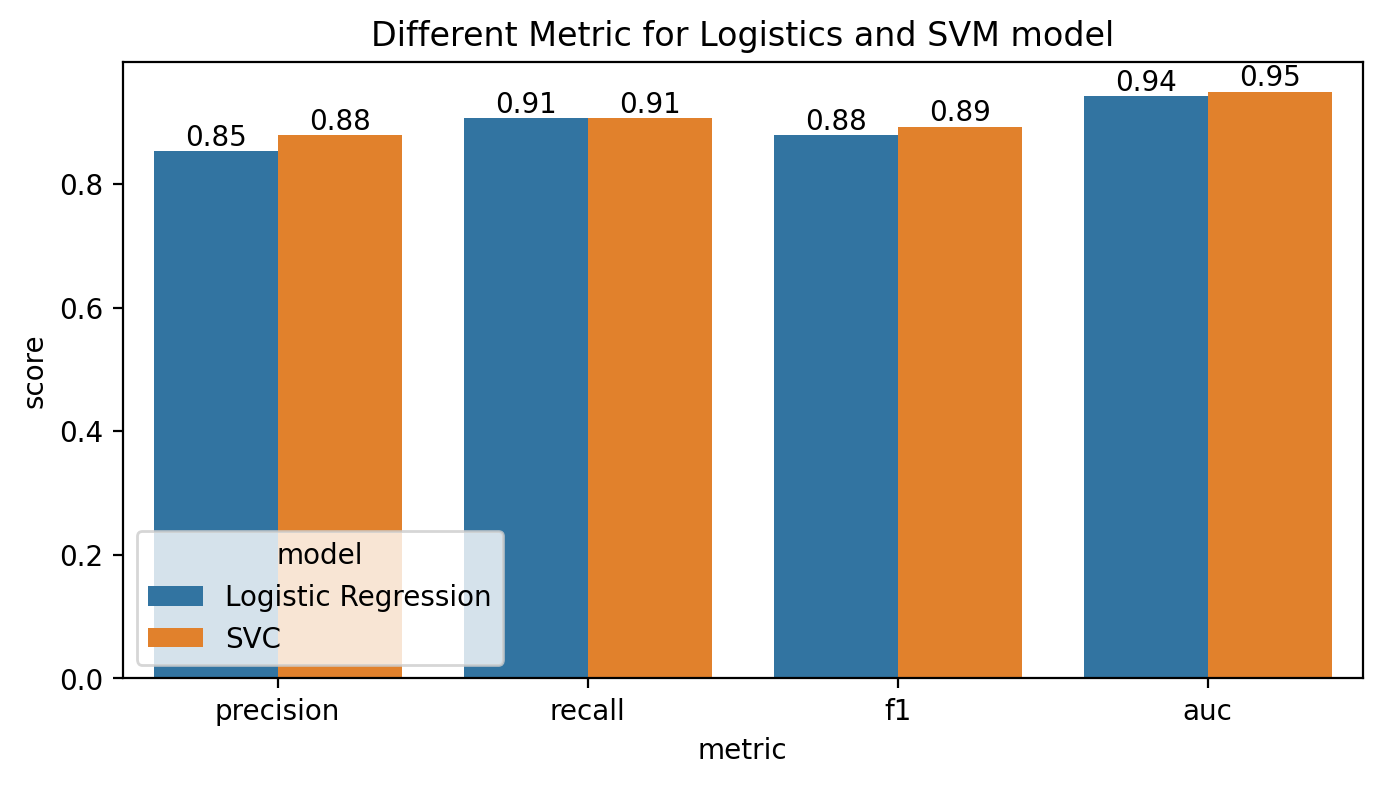

In [148]:
# visuilized result 
fig, ax = plt.subplots(figsize=(8,4), dpi=200)

ax = sns.barplot(df_modelScore, x="metric", y="score", hue="model")
ax.bar_label(ax.containers[1], fontsize=10, fmt="{:.2f}");
ax.bar_label(ax.containers[0], fontsize=10, fmt="{:.2f}");
ax.set_title("Different Metric for Logistics and SVM model")

plt.show()

For a problem where the goal is to classify whether someone has heart disease, false negatives (FN) are indeed more critical than false positives (FP). This is because failing to identify a person with heart disease could have severe consequences, while a false positive might lead to further tests, which are generally safer. \
Higher Recall ensures that FN is lower. Even though we care more about recall but we want precision high as well because if you want to reduce unnecessary follow-ups or tests.

- Recall, for both models are similar at 91%.
- SVM has slightly higher Precision and AUC scorce than Logistic Regression.

Logistic Regression


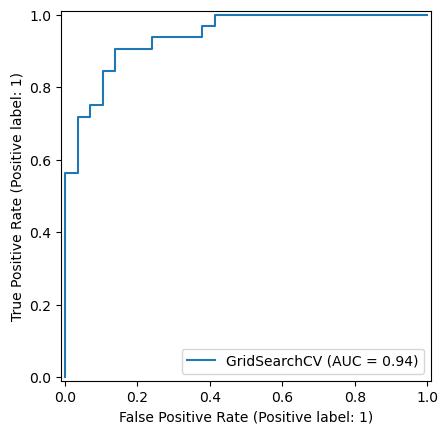

SVC


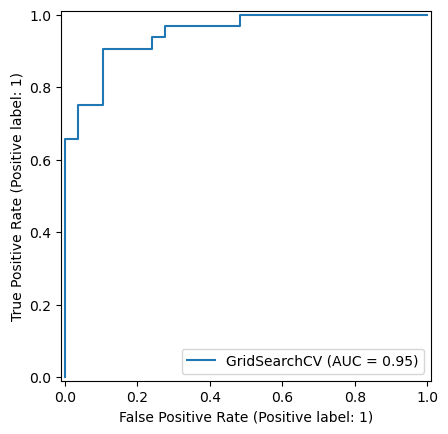

In [160]:
# visuilized ROC curve 
for name, roc in plot_roccurve.items():
    print(name)
    roc.plot()
    plt.show()

- Based on AUC, SVC is marginally better.
- for Logistic Regression; The curve is steep, showing good TPR with minimal FPR at lower thresholds.
- for SVC, curve is similarly steep but may be better at lower FPR.

Logistic Regression


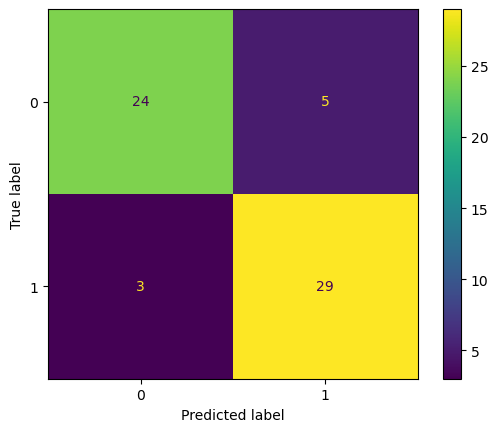

SVC


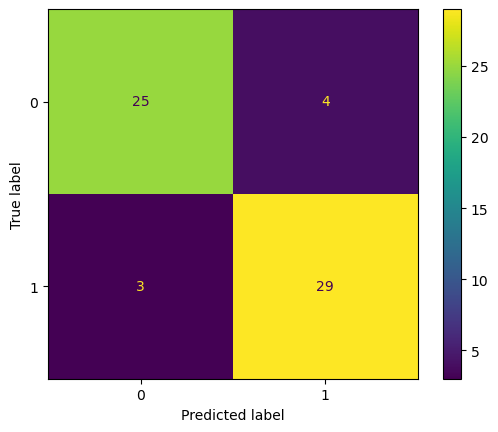

In [166]:
# confusion matrix
for name, cm in confusionmatrix.items():
    print(name)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()

- SVC, 4 false positive whereas Logistic Regression has 5; which tells that SVC has higher precision.

**Conclusion**

Support Vector Machine (SVC) is recommended for heart disease classification due to its slightly better performance:

- Recall: Both models achieve 91%, ensuring low False Negatives (critical for this problem).
- Precision & AUC-ROC: SVC has marginally higher precision and AUC (0.95 vs. 0.94), reducing unnecessary follow-ups/tests.
- Confusion Matrix: SVC has 4 False Positives compared to 5 for Logistic Regression, reflecting better precision.
  
Despite slightly longer training time, SVC balances critical diagnostic needs with fewer False Positives, making it the preferred choice.


## Feature Importance

which features contributed most to the outcomes of the model and how did they contribute?

In [172]:
clf = grid_search_cv["SVC"]
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

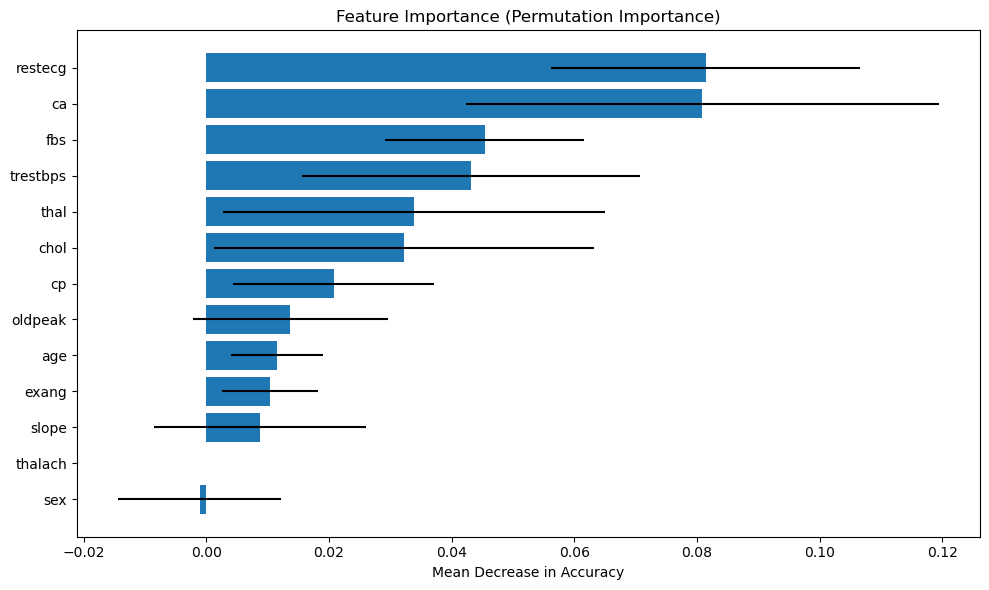

In [176]:
# non-linear SVM classifier, so we are going to use permutation_importance 
# Compute permutation importance
features_names = X.columns
result = permutation_importance(clf, scaled_X_test, y_test, 
                                 n_repeats=30, random_state=42)

importances = result.importances_mean
std = result.importances_std

sorted_importances_idx = result.importances_mean.argsort()
sorted_features = [features_names[i] for i in sorted_importances_idx]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_importances_idx], xerr=std[sorted_importances_idx], align='center')
plt.yticks(range(len(importances)), sorted_features)
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Feature Importance (Permutation Importance)")
plt.tight_layout()
plt.show()

**High Importance Features:**
- restecg (0.081): Has the highest importance, meaning the resting electrocardiographic result strongly impacts predictions.
- ca (0.080): Number of major vessels colored by fluoroscopy also significantly contributes.

**Low Importance Features:**
- thalach (0.0): Maximum heart rate achieved has no noticeable impact on the model's predictions.
- sex (-0.001): Gender appears to slightly harm the model's accuracy, suggesting it's either not useful or introducing noise.